In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# 💾 Look on Data
### 📂 Loading the Dataset
Importing the California housing dataset to start the analysis and modeling process.


In [2]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# ℹ️ **Basic Information & Data Overview**
Quick look at the dataset structure, data types, and key statistics to understand what we're working with.


In [3]:
print('There are {} columns and {} rows'.format(df.shape[1],df.shape[0]))

There are 10 columns and 20640 rows


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 🛠️ **Handling Missing Values**
Checking for missing data and applying strategies (e.g., imputation) to ensure a clean dataset for modeling.


In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

---
# 🖼️ **Visualization**

### 🎨 Importing Visualization Libraries
Loading libraries like `seaborn` and `matplotlib` to help explore data patterns through visualizations.


In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

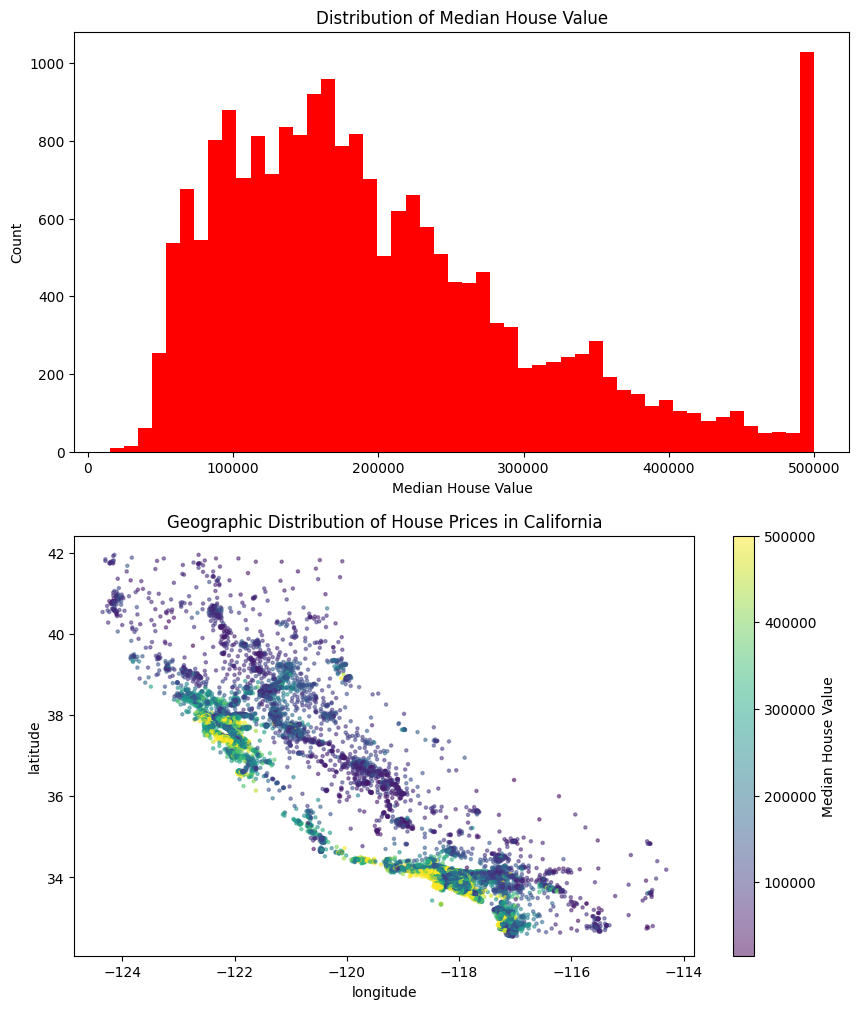

In [9]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.hist(df['median_house_value'], bins=50, color='red')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Count')
plt.subplot(2,1,2)
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', s=5, alpha=0.5)
plt.colorbar(label='Median House Value')
plt.title('Geographic Distribution of House Prices in California')
plt.xlabel('longitude')
plt.ylabel('latitude');

### 🏡 **Distribution of Median House Value – Insights**

- The majority of houses in the dataset have a median value between 100,000 and 200,000.
- Property values above 300,000 are less common.
- There is a clear spike at 500,000, which indicates that the data is capped at this value. All houses worth more than 500,000 were recorded as exactly 500,000.
- The distribution is right-skewed, showing that most homes are in the lower to mid-price range.
- This capped data should be handled carefully in predictive modeling to avoid bias when estimating high-value properties.

### 🗺️Geographic Distribution of House Prices in California

The scatter plot visualizes housing prices across California based on geographic coordinates. It clearly shows that:

- The **highest median house values** are concentrated around major urban areas such as **San Francisco** and **Los Angeles**, where the most of yellow points are located. 
- Inland regions exhibit significantly **lower property values**, with most homes priced well below coastal areas.
- The distribution of housing prices follows the state's geography, with dense clusters along the **coastline**, reflecting population centers.
- The visible concentration of points at the \$500,000 mark indicates a **capped value** in the dataset, suggesting that many properties could exceed this price in reality.
- The visualization suggests that, in general, **house prices decrease as the distance from the coastline increases**. Higher property values are predominantly located along the coastal areas, especially near major cities. Inland regions tend to have significantly lower median house values. 


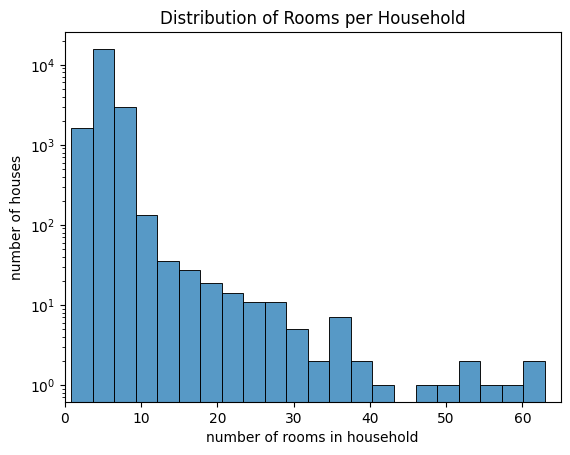

In [10]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
sns.histplot(df['rooms_per_household'], bins=50)
plt.yscale('log')
plt.xlim(0, 65)
plt.title('Distribution of Rooms per Household')
plt.ylabel('number of houses')
plt.xlabel('number of rooms in household');

### 📌Distribution of Rooms per Household – Insights

The histogram shows that the majority of households in the dataset have between **2 and 10 rooms per household**, which reflects typical residential properties.

There is a noticeable **long tail** in the distribution, indicating the presence of some locations with exceptionally large houses, featuring **50 or more rooms per household**. These cases likely represent luxury villas, estates, or sparsely populated areas with large buildings.

The use of a **logarithmic scale** on the Y-axis highlights that such large properties are extremely rare compared to standard-sized homes. The distribution is clearly **right-skewed**, suggesting that most data points cluster around smaller values, with a few significant outliers.



In [11]:
df[df['rooms_per_household']>=50]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1912,-120.16,39.01,16.0,1463.0,264.0,54.0,26.0,4.9750,206300.0,INLAND,56.269231
1913,-120.06,39.01,19.0,2967.0,528.0,112.0,48.0,4.0714,437500.0,INLAND,61.812500
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,141.909091
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333
2395,-119.34,37.12,23.0,1881.0,380.0,64.0,37.0,3.8750,125000.0,INLAND,50.837838
9676,-119.02,37.64,14.0,5919.0,1278.0,265.0,112.0,3.2431,221400.0,INLAND,52.848214
11707,-120.06,39.15,22.0,2213.0,372.0,98.0,42.0,1.1912,170000.0,INLAND,52.690476
11862,-121.25,40.27,25.0,958.0,245.0,28.0,16.0,2.6250,67500.0,INLAND,59.875000
12447,-114.49,33.97,17.0,2809.0,635.0,83.0,45.0,1.6154,87500.0,INLAND,62.422222


✨The exceptionally high values of `rooms_per_household` observed in certain inland or remote areas are likely due to a combination of factors:

- A **very low number of households** within specific census blocks, which inflates the ratio when divided by the total number of rooms.
- Presence of **large estates, ranches, hotels, or seasonal accommodations** common in rural areas, near national parks, or tourist destinations like Mammoth Lakes.

These insights suggest that such extreme values are not necessarily errors but reflect the unique characteristics of certain locations in California.


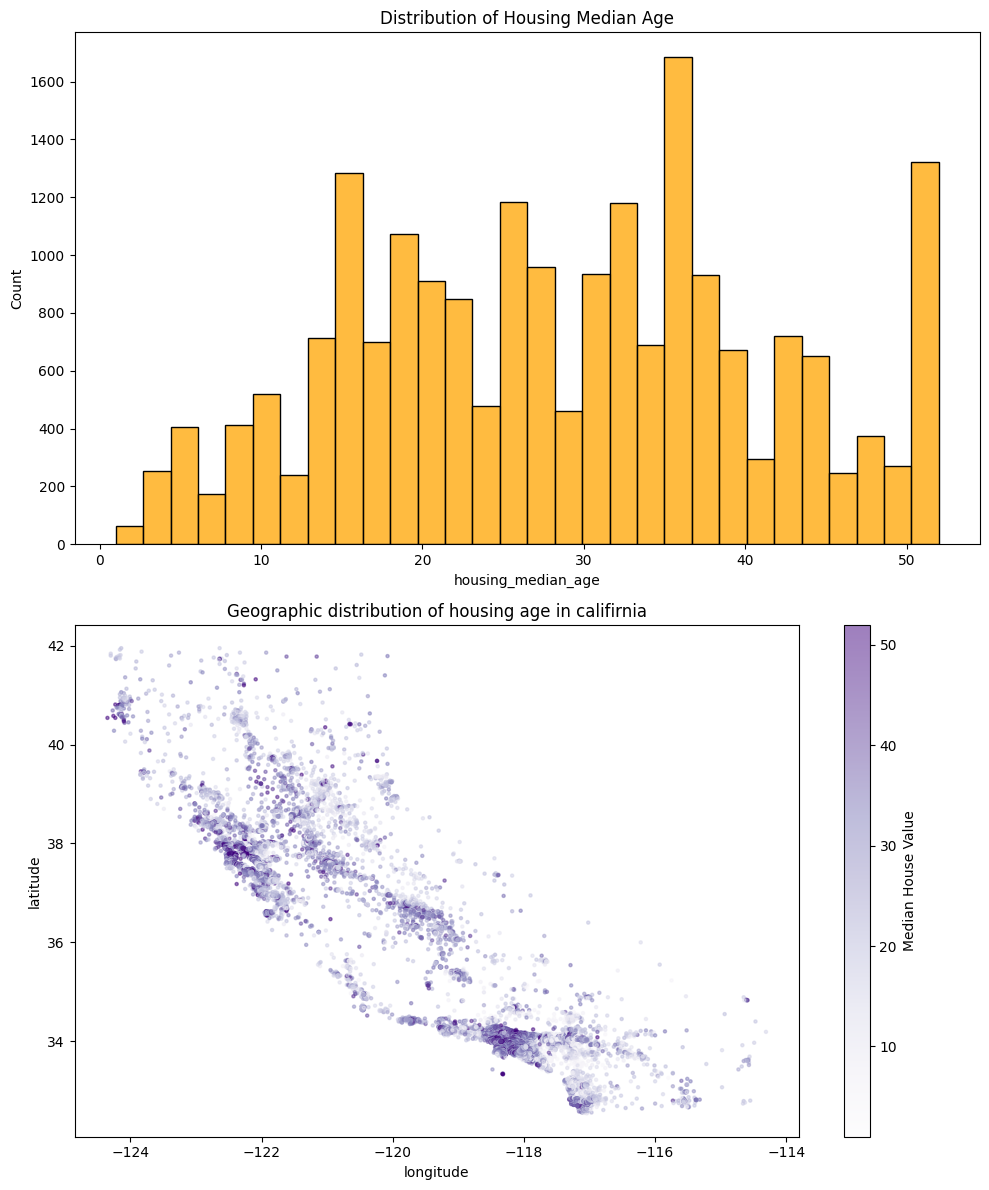

In [12]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
sns.histplot(df['housing_median_age'], bins=30, color='orange')
plt.title('Distribution of Housing Median Age')
plt.subplot(2,1,2)
plt.scatter(df['longitude'], df['latitude'], c=df['housing_median_age'], cmap='Purples', s=5, alpha=0.5)
plt.title('Geographic distribution of housing age in califirnia')
plt.colorbar(label='Median House Value')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.tight_layout()
plt.show()

### 🏠 Housing Median Age Analysis

The histogram shows that the **age of houses** in California is unevenly distributed, with noticeable peaks around **20 to 35 years** and a significant number of properties reaching the maximum recorded value of **52 years**. This suggests periods of intensive housing development and potential capping in the dataset.

The geographic distribution indicates that **older houses** are primarily located in the northern parts of California and along major urban centers such as **San Francisco** and **Sacramento**. In contrast, **newer constructions** are more common in the southern regions, including areas near **Los Angeles** and **San Diego**.

These patterns reflect historical urban growth, where older cities retain aged infrastructure, while newer developments expand outward into suburban and less populated areas.


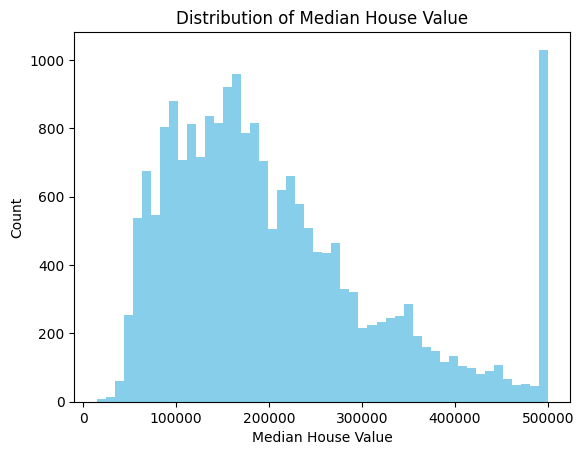

In [13]:
plt.hist(df['median_house_value'], bins=50, color='skyblue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Count');


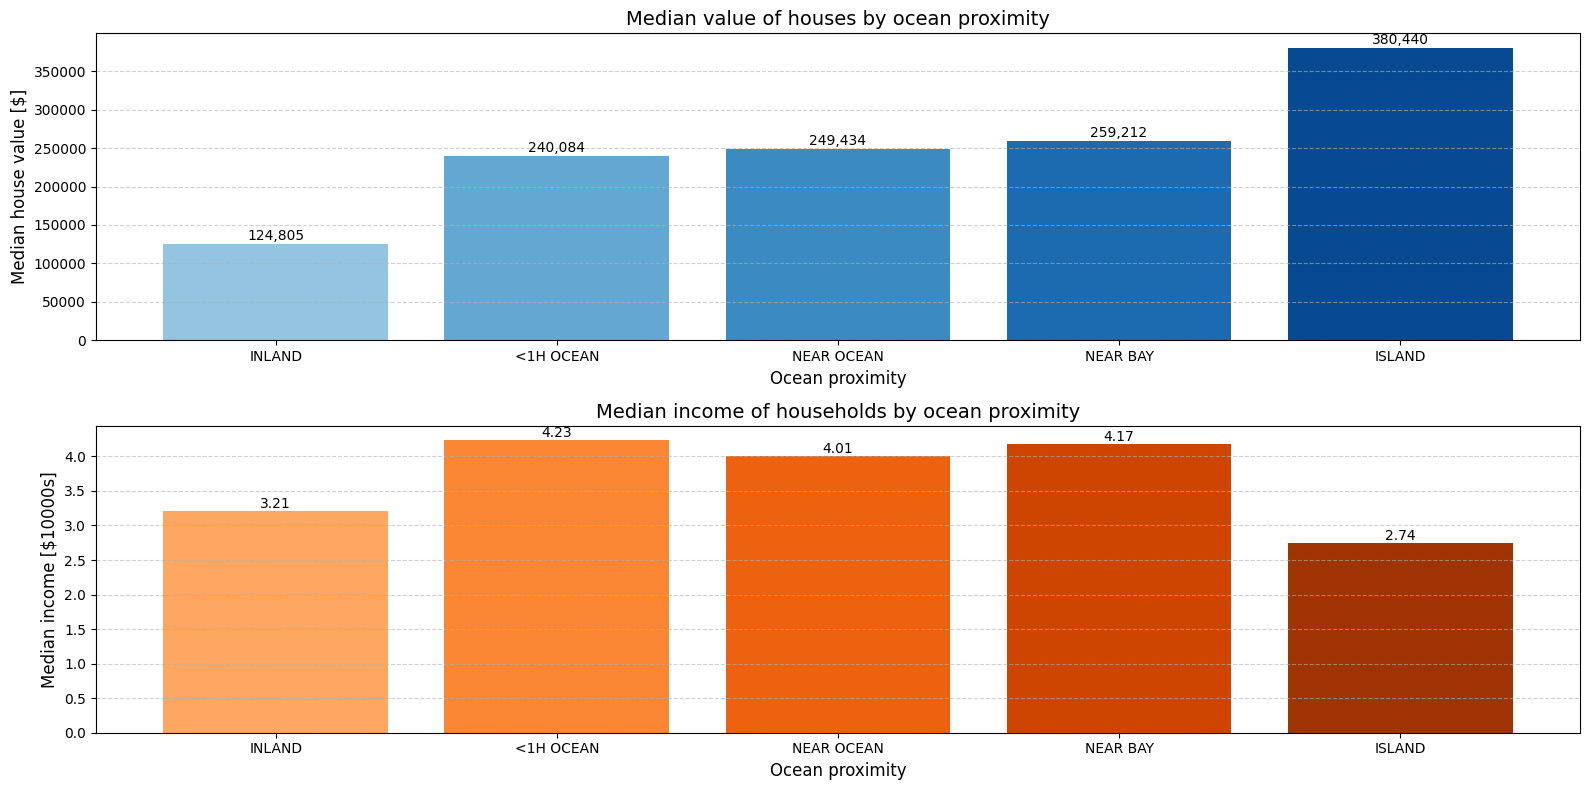

In [14]:

# Agregowanie danych
value = df.groupby('ocean_proximity')['median_house_value'].mean().sort_values()
income = df.groupby('ocean_proximity')['median_income'].mean().loc[value.index]  # dopasuj kolejność

# Kolory
colors1 = cm.Blues(np.linspace(0.4, 0.9, len(value)))
colors2 = cm.Oranges(np.linspace(0.4, 0.9, len(income)))

# Wykres
plt.figure(figsize=(16, 8))

# -------------------- GÓRNY WYKRES --------------------
plt.subplot(2, 1, 1)
bars1 = plt.bar(value.index, value.values, color=colors1)
plt.title('Median value of houses by ocean proximity', fontsize=14)
plt.xlabel('Ocean proximity', fontsize=12)
plt.ylabel('Median house value [$]', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Etykiety nad słupkami
for i, v in enumerate(value.values):
    plt.text(i, v + 5000, f'{v:,.0f}', ha='center', fontsize=10)

# -------------------- DOLNY WYKRES --------------------
plt.subplot(2, 1, 2)
bars2 = plt.bar(income.index, income.values, color=colors2)
plt.title('Median income of households by ocean proximity', fontsize=14)
plt.xlabel('Ocean proximity', fontsize=12)
plt.ylabel('Median income [$10000s]', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Etykiety nad słupkami
for i, v in enumerate(income.values):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)

# Finalizacja
plt.tight_layout()
plt.show()


### 📊 Analysis of Median House Value and Income by Ocean Proximity

The first bar chart illustrates how **median house values** vary depending on proximity to the ocean:

- 🏝️ **Island** properties have the **highest median value** (~\$380,000).
- 🏞️ **Inland** areas show the **lowest house values**, around \$125,000.
- 🌊 Locations **near the ocean** or **bay**, as well as those **within 1 hour** from the ocean, have similar median values, ranging between \$240,000 and \$260,000.

The second chart presents **median household income** across these same regions:

- The **highest incomes** are observed in areas **<1H OCEAN** (~\$42,300) and **NEAR BAY** (\$41,700).
- Surprisingly, **island residents** have the **lowest median income** (~\$27,400), despite living in the most expensive areas.
- **Inland** areas also show low income levels (~\$32,100), consistent with their lower property values.

---

### 🧠 **Key Insights:**

- **Proximity to the ocean significantly increases property values**, especially on islands.
- There is **no direct correlation** between median income and house value:
  - Island regions combine **high property prices** with **low resident income**, suggesting these may be vacation homes, luxury estates, or areas with non-resident ownership.
- Coastal areas (**NEAR BAY**, **NEAR OCEAN**) offer a balance of **higher incomes** and **moderate property values**.
- **Inland regions** represent the most affordable housing but are associated with lower household incomes.

---

These findings highlight how geographic location impacts both real estate prices and socio-economic conditions, with islands standing out as unique cases where property value is driven by factors beyond local income levels.


Text(0.5, 0, 'ocean proximity')

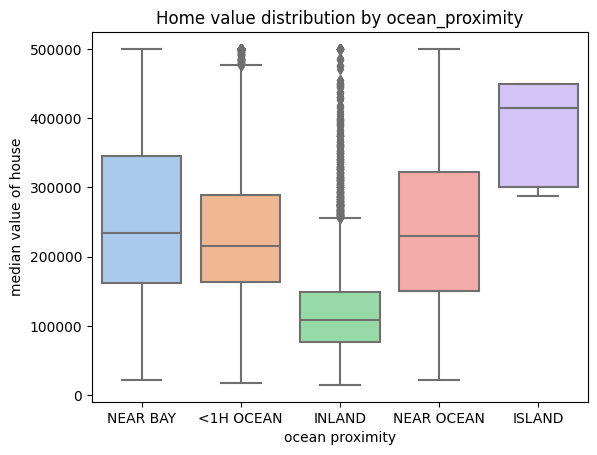

In [15]:

sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', palette='pastel')
plt.title('Home value distribution by ocean_proximity')
plt.ylabel('median value of house')
plt.xlabel('ocean proximity')

### 📊 Observations from the Boxplot of House Value by Ocean Proximity

- **Island properties** show the highest median house values with a narrow distribution, indicating consistently high property prices.
- **Inland areas** have the lowest median house values and a large number of outliers, suggesting significant variability with some properties priced well above the typical range.
- Properties **Near Bay** and **Near Ocean** display similar distributions, with moderate median values and wider spreads, reflecting diverse housing markets in these coastal areas.
- The **<1H OCEAN** category has a slightly lower median compared to coastal areas but still exhibits a wide range of house values.
- Overall, proximity to the ocean tends to increase both the median value and variability of house prices, except for islands where prices remain uniformly high.

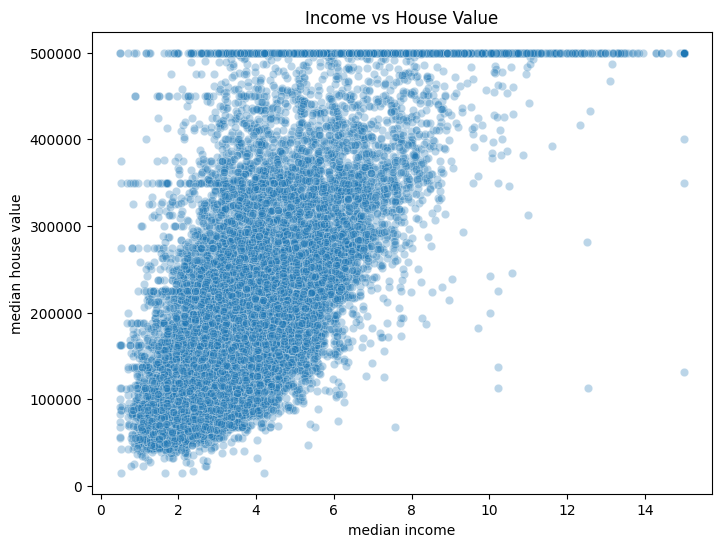

In [16]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.3)
plt.title('Income vs House Value')
plt.xlabel('median income')
plt.ylabel('median house value');

### 📈 Scatter Plot Analysis: Income vs. House Value

The scatter plot illustrates a **strong positive correlation** between median household income and median house value, indicating that higher incomes are generally associated with more expensive properties.

- Most data points are **clustered** within the lower to mid-range income and house value brackets, reflecting a predominance of households in moderate economic conditions.
- A prominent horizontal line at **500,000** highlights a **capping effect** in the dataset, where all house values exceeding this threshold were recorded as exactly 500,000.
- A few notable **outliers** appear — households with relatively high incomes but unexpectedly lower house values, suggesting unique market conditions or regional factors.

This pattern emphasizes the strong link between economic status and property value, while also underlining the importance of addressing capped data in further analysis.


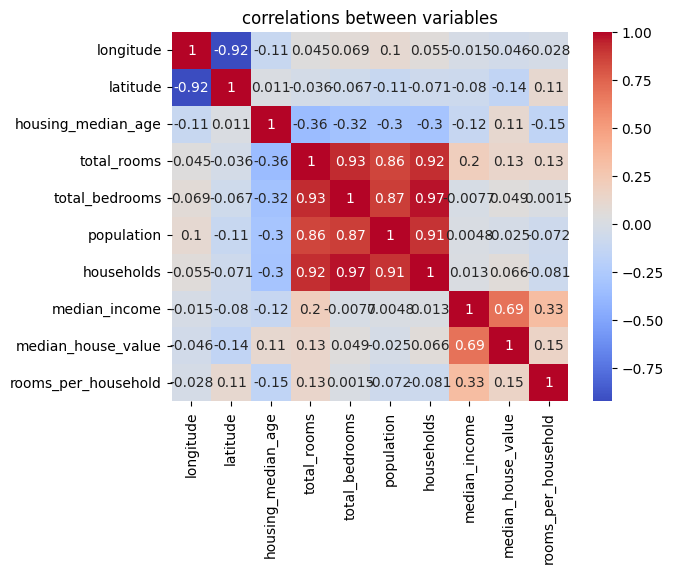

In [17]:
import seaborn as sns
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('correlations between variables');


### 🔥 Correlation Heatmap Analysis

The correlation heatmap reveals several key relationships between variables in the dataset:

- There is a **strong positive correlation** between:
  - `total_rooms` and `total_bedrooms` (**0.93**)
  - `total_rooms` and `households` (**0.92**)
  - `population` and `households` (**0.91**)
  
  These correlations are expected, as more rooms typically imply more bedrooms and households, and higher population relates to more households.

- `median_income` shows a **moderate positive correlation** with `median_house_value` (**0.69**), indicating that higher income areas tend to have more expensive houses.

- The variable `rooms_per_household` has a **weak positive correlation** with both `median_income` (**0.33**) and `median_house_value` (**0.15**), suggesting that areas with more rooms per household may slightly relate to wealthier regions and higher house values.

- A **strong negative correlation** exists between `longitude` and `latitude` (**-0.92**), reflecting California's geographic orientation from northwest to southeast.

- Other variables, such as `housing_median_age`, show **weak or no significant correlation** with house value or income, implying limited direct impact.

---

### 📌 Insights:
- Multicollinearity is present among variables like `total_rooms`, `total_bedrooms`, `population`, and `households`. These should be handled carefully in predictive models to avoid redundancy.
- `median_income` appears to be the most important predictor for `median_house_value`.
- The overall weak correlations with `housing_median_age` suggest that the age of houses does not strongly influence other variables in this dataset.


---
# 🤖 **Model Building**
### 📥 Importing Libraries
Import of essential libraries for data preprocessing, machine learning models and hyperparameter tuning.

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

# ⚙️ **Feature Selection & Data Preparation**
- Selection of key features influencing house prices.
- Encoding of the `ocean_proximity` categorical variable using One-Hot Encoding.
- Splitting data into training (80%) and test (20%) sets for proper evaluation.


In [19]:
features = ['longitude', 
            'latitude', 
            'median_income',
            'housing_median_age',
            'rooms_per_household',
            'ocean_proximity']
X = df[features].copy()
y = df['median_house_value']

encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' żeby uniknąć dummy variable trap
ocean_encoded = encoder.fit_transform(X[['ocean_proximity']])

ocean_encoded_df = pd.DataFrame(ocean_encoded, columns=encoder.get_feature_names_out(['ocean_proximity']), index=X.index)

X = pd.concat([X.drop(columns=['ocean_proximity']), ocean_encoded_df], axis=1)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (16512, 9)
Test set shape: (4128, 9)


# 🌳 **Baseline Random Forest Model**
- Training a basic Random Forest Regressor to predict house prices.
- Initial evaluation using **R² Score** and **Mean Absolute Error (MAE)** as baseline metrics.


In [21]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 3️⃣ Predykcja
y_pred = model.predict(X_test)

# 4️⃣ Ewaluacja
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2%}")   
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 82.33%
Mean Absolute Error: 30932.33


# 🔍 **Hyperparameter Tuning with GridSearchCV**
- Fine-tuning Random Forest parameters using Grid Search and cross-validation (**cv=3**).
- Best model selected based on optimal R² performance.
- Noticeable improvement after tuning.


In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],        # liczba drzew
    'max_depth': [None, 10, 20, 30],        # maksymalna głębokość drzewa
    'min_samples_split': [2, 5, 10],        # minimalna liczba próbek do podziału
    'min_samples_leaf': [1, 2, 4]           # minimalna liczba próbek w liściu
}


In [23]:
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                      # 3-krotna walidacja krzyżowa
    scoring='r2',              # Mierzymy R²
    n_jobs=-1,                 # Wykorzystaj wszystkie rdzenie CPU
    verbose=2                  # Pokaż postęp
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  16.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  23.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  21.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  12.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  19.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  13.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   6.5s
[CV] END

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

# 📊 **Final Evaluation & Visualization**
- Final model tested on unseen data.
- Scatter plot compares **Actual vs Predicted** house values.
- The closer the points to the red dashed line, the better the prediction accuracy.
- Histogram of prediction errors distribution.

In [24]:
best_model = grid_search.best_estimator_
y_pred_rfr = best_model.predict(X_test)

final_r2 = r2_score(y_test, y_pred)
print(f"Final R² on Test Set: {final_r2:.2%}")
print(f"Mean Absolute Error: {mae:.2f}")

Final R² on Test Set: 82.33%
Mean Absolute Error: 30932.33


NameError: name 'residuals' is not defined

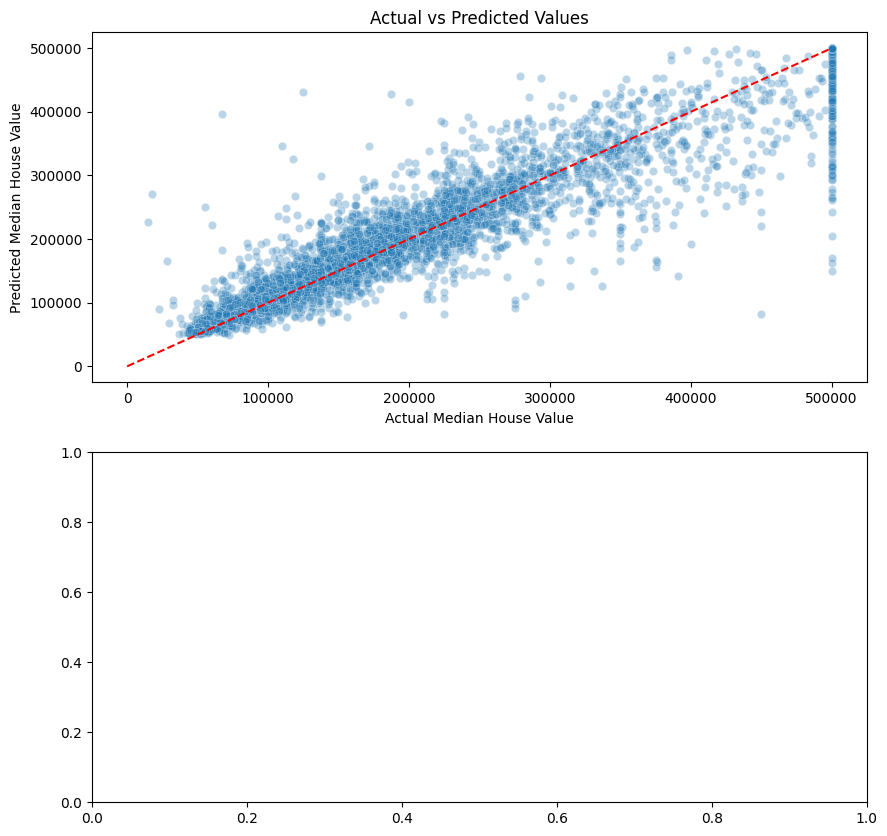

In [25]:

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)

plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values')

# Linia idealnych predykcji
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--')

plt.subplot(2,1,2)
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.show()

plt.show()
